# Prepare data

# Explainable AI for Breast Cancer Detection and Analysis

## Overview
This project demonstrates the use of Explainable AI techniques in analyzing and detecting breast cancer. **By leveraging advanced algorithms, the project aims to make machine learning predictions more transparent and actionable for medical professionals.**

### Key Features
- **Explainability with SHAP, Banzhaf, and Remove Explanations Library:** Utilizes Shapley values, Banzhaf power index, and individual removal methods to explain model predictions.
- **Breast Cancer Detection:** Implements predictive models for breast cancer diagnosis using well-established datasets.
- **Interpretation and Analysis:** Provides detailed visualizations and explanations to help users understand the model's behavior and important features.

---

## Significance

### Medical Impact
**Early and accurate detection of breast cancer** can significantly improve patient outcomes. This project provides:
- **Transparency in Decision-Making:** Enables medical professionals to understand why a model makes a certain prediction, building trust in AI systems.
- **Feature Importance Analysis:** Highlights the most critical factors influencing predictions, guiding clinicians toward key diagnostic indicators.


### Ethical and Practical Relevance
- **Accountability:** Ensures that AI-driven decisions in healthcare are understandable and justifiable.
- **Adoption:** Facilitates wider acceptance of AI tools by addressing the "black-box" nature of machine learning models.

---

## Key Libraries Used
- [SHAP](https://github.com/slundberg/shap): For generating Shapley explanations.
- [Banzhaf](https://pypi.org/project/banzhaf/): For computing Banzhaf power indices.
- Remove Explanations Library: For individual feature removal impact analysis.
- Scikit-learn: For machine learning models.
- Matplotlib/Seaborn: For visualizations.



## Results
### Among feature selection methods, SHAP (Top 10) provided the lowest cross-entropy loss, demonstrating its effectiveness in identifying the most relevant features for prediction.

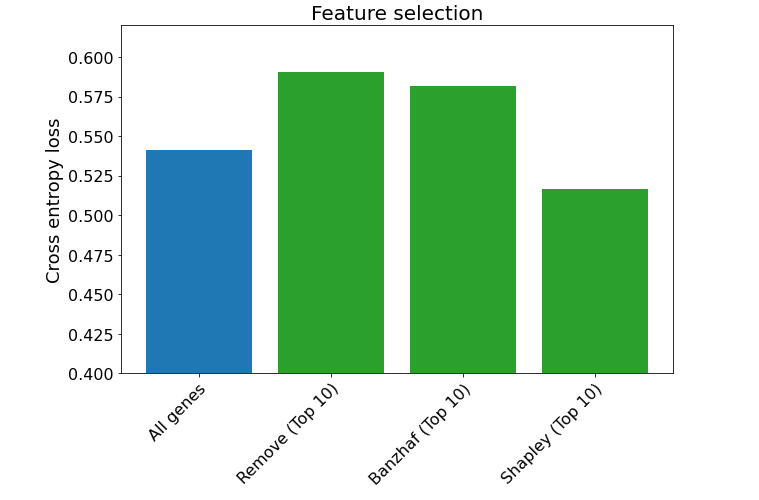

In [41]:
from IPython.display import Image, display
image_path = 'ce.png'
display(Image(filename=image_path))

### Sample of features which indicates the effectiveness of the feature in diagnosis of breast cancer based on the gene type using shapley values


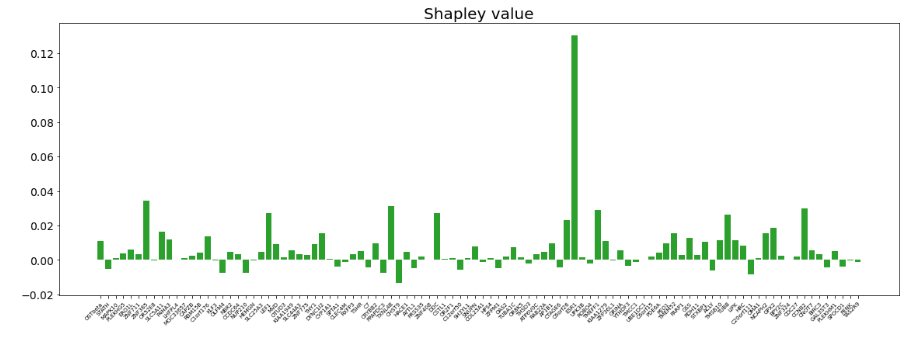

In [42]:
image_path = 'shap.png'
display(Image(filename=image_path))

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
# Load data
data = pd.read_csv('brca_small.csv', index_col=0)
X = data.values[:, :-1]
Y = data.values[:, -1]
genes = data.columns.tolist()[:-1]
num_genes = len(genes)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=100, random_state=1)

# Normalize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [45]:
print(genes, end = " ")

['OSTbeta', 'STATH', 'MAPK10', 'PLEKHG5', 'ERO1L', 'ZNF711', 'ZNF385', 'OR52E8', 'SLC5A11', 'P4HA3', 'LHFPL4', 'MGC33657', 'CAPZB', 'RBM15B', 'C1orf176', 'KLF3', 'OLFM4', 'NBR2', 'CCDC64', 'NUP210', 'HEMGN', 'SLC25A3', 'LEF1', 'MVD', 'OTUD3', 'KIAA1949', 'SLC44A3', 'ZNF775', 'THY1', 'DYNC1I2', 'CYP1A1', 'SPTA1', 'CLEC4M', 'RXFP3', 'TSHR', 'C7', 'CRYBB2', 'PPAPDC3', 'TXNL4B', 'CHST9', 'HACE1', 'AYTL1', 'PRSS35', 'ZNF408', 'DDC', 'CSTL1', 'OR2F1', 'C12orf50', 'SH3YL1', 'SNUPN', 'COL25A1', 'HPS4', 'ZFPM1', 'OAS2', 'TUBA1C', 'OR8K5', 'THSD3', 'ATP6V0C', 'RAB22A', 'AP1B1', 'CTAGE6', 'C6orf26', 'ESR1', 'UPK3B', 'ROBO4', 'TMEFF1', 'KIAA1279', 'ZFP36L1', 'GRINA', 'YTHDF3', 'TMCC1', 'UBE1DC1', 'C6orf15', 'PDE6A', 'PEO1', 'TMEM52', 'PARP1', 'GSS', 'RDH11', 'STXBP1', 'ACLY', 'TMSB10', 'TUBB', 'LIPK', 'HRC', 'C20orf111', 'OMA1', 'NCAPH2', 'GPX2', 'BPY2C', 'ZNF324', 'CDC27', 'CCNB2', 'CNOT7', 'BIRC3', 'GAL3ST3', 'PLEKHM1', 'SPOCD1', 'PENK', 'TAS2R9'] 

# Train model

- Use cross validation to select the optimal parameter for Lasso penalty.

In [46]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

1. L1 Regularization (Lasso Penalty):
Encourages sparsity in the model by driving some feature coefficients to zero.
Controlled by C (smaller C increases regularization strength).
2. Cross-Validation:
Evaluates multiple values of C to find the one that minimizes the validation loss (log loss).
Log loss is a metric that evaluates the performance of probabilistic predictions.

In [47]:
#Calculating best c value for regularization
def fit_model(x, y, x_val, y_val):
    # Cross validate for C
    C_list = np.arange(0.1, 1.0, 0.05)
    best_loss = np.inf
    best_C = None

    for C in C_list:
        # Fit model
        model = LogisticRegression(C=C, penalty='l1', multi_class='multinomial',
                                   solver='saga', max_iter=20000)
        model.fit(x, y)

        # Calculate loss
        val_loss = log_loss(y_val, model.predict_proba(x_val))

        # See if best
        if val_loss < best_loss:
            best_loss = val_loss
            best_C = C

    # Train model with all data
    model = LogisticRegression(C=best_C, penalty='l1', multi_class='multinomial',
                               solver='saga', max_iter=10000)
    model.fit(np.concatenate((x, x_val), axis=0),
              np.concatenate((y, y_val), axis=0))

    return model

In [48]:
# Train model
original_model = fit_model(X_train, Y_train, X_val, Y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# Train surrogate model

- A surrogate model mimics the original model's predictions when features are held out.

In [49]:
!git clone https://github.com/iancovert/removal-explanations.git

fatal: destination path 'removal-explanations' already exists and is not an empty directory.


In [50]:
!cd removal-explanations && pip install .

Processing /content/removal-explanations
  Preparing metadata (setup.py) ... done
  Created wheel for removal-explanations: filename=removal_explanations-0.0.1-py3-none-any.whl size=7043 sha256=0d277ed098ee146cd1b9d19365243c987ac8602d48195dfc0f04fc23a72375dd
  Stored in directory: /root/.cache/pip/wheels/e7/72/1e/3e66c015a4b22dee21d9942ff5103e21dcc47a53a405428e0d
Successfully built removal-explanations
  Attempting uninstall: removal-explanations
    Found existing installation: removal-explanations 0.0.1
    Uninstalling removal-explanations-0.0.1:
      Successfully uninstalled removal-explanations-0.0.1


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, BatchSampler
from rexplain.torch import MaskLayer1d
from copy import deepcopy
import matplotlib.pyplot as plt

For example:
- Instead of having a target like 2 (representing class 2), the target would be a vector like [0.1, 0.7, 0.2], indicating probabilities for each class.

In [52]:
# Custom loss function
class CELoss(nn.Module):
    '''Cross entropy loss for distributional targets. Expects logits.'''
    def __init__(self):
        super().__init__()

    def forward(self, pred, target):
        return - torch.mean(
            torch.sum(pred.log_softmax(dim=1) * target, dim=1))

In [53]:
# Prepare device
device = torch.device('cuda')

# Prepare training data
X_model = torch.tensor(X_train, dtype=torch.float32)
Y_model = torch.tensor(original_model.predict_proba(X_train),
                       dtype=torch.float32)

#### This code prepares a validation dataset by repeating the validation data and creating random masks (S_val) that control which features are included for each example. These are combined into a dataset and loaded in batches for processing. The validate function checks how well the model performs by applying the masks, making predictions, and calculating the average loss. This helps test the model's performance and understand which features are important.

In [54]:
# Prepare validation data
Y_val_surrogate = torch.tensor(original_model.predict_proba(X_val).repeat(1000, 0),
                               dtype=torch.float32)
X_val_surrogate = torch.tensor(X_val.repeat(1000, 0), dtype=torch.float32)

# Random subsets
S_val = torch.ones(X_val_surrogate.shape)
num_included = np.random.choice(num_genes + 1, size=len(S_val))
for i in range(len(S_val)):
    S_val[i, num_included[i]:] = 0
    S_val[i] = S_val[i, torch.randperm(num_genes)]

# Create dataset iterator
val_set = TensorDataset(X_val_surrogate, Y_val_surrogate, S_val)
val_loader = DataLoader(val_set, batch_size=25000)

def validate(model):
    '''Measure performance on validation set.'''
    with torch.no_grad():
        # Setup
        mean_loss = 0
        N = 0

        # Iterate over validation set
        for x, y, S in val_loader:
            x = x.to(device)
            y = y.to(device)
            S = S.to(device)
            pred = model((x, S))
            loss = loss_fn(pred, y)
            N += len(x)
            mean_loss += len(x) * (loss - mean_loss) / N

    return mean_loss

In [55]:
# Set up model
model = nn.Sequential(
    MaskLayer1d(value=0),
    nn.Linear(2 * num_genes, 64),
    nn.ELU(inplace=True),
    nn.Linear(64, 64),
    nn.ELU(inplace=True),
    nn.Linear(64, 4)).to(device)

# Training parameters
lr = 1e-3
nepochs = 1000
early_stop_epochs = 10

# Loss function
loss_fn = CELoss()
loss_list = []

for mbsize in (32, 128, 512, 1024, 2048, 5096, 10192):
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Set up data loaders
    train_set = TensorDataset(X_model, Y_model)
    random_sampler = RandomSampler(
        train_set, replacement=True,
        num_samples=int(np.ceil(len(X_model) / mbsize))*mbsize)
    batch_sampler = BatchSampler(random_sampler, batch_size=mbsize, drop_last=True)
    train_loader = DataLoader(train_set, batch_sampler=batch_sampler)

    # For saving best model
    min_epoch = 0
    best_model = deepcopy(model)
    best_epoch_loss = validate(model).item()
    best_epoch = 0

    # Begin training
    for epoch in range(nepochs):
        for i, (x, y) in enumerate(train_loader):
            # Prepare data
            x = x.to(device)
            y = y.to(device)

            # Generate subset
            S = torch.ones(mbsize, num_genes, dtype=torch.float32, device=device)
            num_included = np.random.choice(num_genes + 1, size=mbsize)
            for j in range(mbsize):
                S[j, num_included[j]:] = 0
                S[j] = S[j, torch.randperm(num_genes)]

            # Make predictions
            pred = model((x, S))
            loss = loss_fn(pred, y)

            # Optimizer step
            loss.backward()
            optimizer.step()
            model.zero_grad()

        # End of epoch progress message
        val_loss = validate(model).item()
        loss_list.append(val_loss)
        print('----- Epoch = {} -----'.format(epoch + 1))
        print('Val loss = {:.4f}'.format(val_loss))
        print('')

        # Check if best model
        if epoch >= min_epoch:
            if val_loss < best_epoch_loss:
                best_epoch_loss = val_loss
                best_model = deepcopy(model)
                best_epoch = epoch
                print('New best epoch, val loss = {:.4f}'.format(val_loss))
                print('')
            else:
                # Check for early stopping
                if epoch - best_epoch == early_stop_epochs:
                    print('Stopping early')
                    break

    model = best_model

----- Epoch = 1 -----
Val loss = 1.0974

New best epoch, val loss = 1.0974

----- Epoch = 2 -----
Val loss = 0.9937

New best epoch, val loss = 0.9937

----- Epoch = 3 -----
Val loss = 0.8737

New best epoch, val loss = 0.8737

----- Epoch = 4 -----
Val loss = 0.7862

New best epoch, val loss = 0.7862

----- Epoch = 5 -----
Val loss = 0.7417

New best epoch, val loss = 0.7417

----- Epoch = 6 -----
Val loss = 0.7161

New best epoch, val loss = 0.7161

----- Epoch = 7 -----
Val loss = 0.6991

New best epoch, val loss = 0.6991

----- Epoch = 8 -----
Val loss = 0.6943

New best epoch, val loss = 0.6943

----- Epoch = 9 -----
Val loss = 0.6861

New best epoch, val loss = 0.6861

----- Epoch = 10 -----
Val loss = 0.6849

New best epoch, val loss = 0.6849

----- Epoch = 11 -----
Val loss = 0.6921

----- Epoch = 12 -----
Val loss = 0.6759

New best epoch, val loss = 0.6759

----- Epoch = 13 -----
Val loss = 0.6806

----- Epoch = 14 -----
Val loss = 0.6716

New best epoch, val loss = 0.6716

-

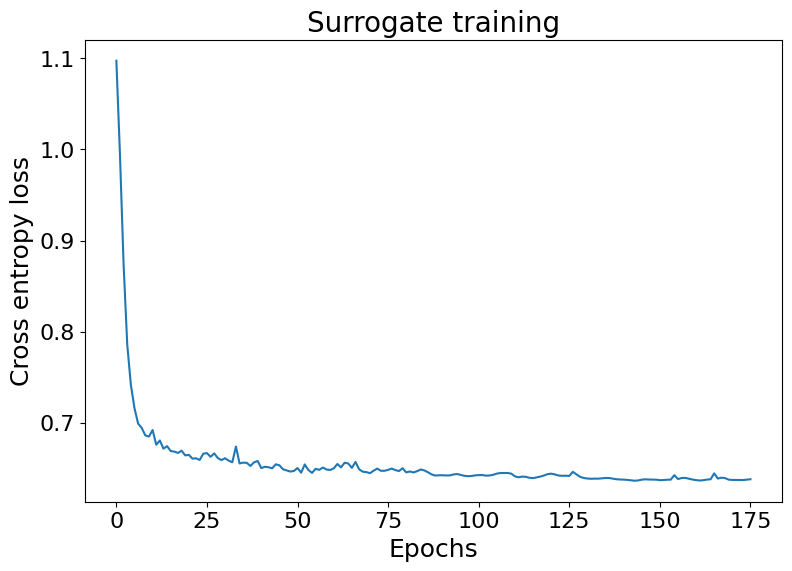

In [56]:
# Plot loss during training
plt.figure(figsize=(9, 6))
plt.plot(loss_list)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Cross entropy loss', fontsize=18)
plt.tick_params(labelsize=16)
plt.title('Surrogate training', fontsize=20)
plt.show()

# Generate explanations

- Explain dataset loss (rather than individual predictions).

In [57]:
from rexplain import removal, behavior, summary
from rexplain.utils import crossentropyloss

In [58]:
# Make model callable with numpy input
model_lam = lambda x, S: torch.softmax(
    model((torch.tensor(x, dtype=torch.float32, device=device),
           torch.tensor(S, dtype=torch.float32, device=device))),
    dim=1).cpu().data.numpy()

# Model extension
conditional_extension = removal.ConditionalSupervisedExtension(model_lam)

# Cooperative game
game = behavior.DatasetLossGame(conditional_extension, X_test, Y_test, crossentropyloss)

CPU times: user 10.1 ms, sys: 12 µs, total: 10.1 ms
Wall time: 12.5 ms


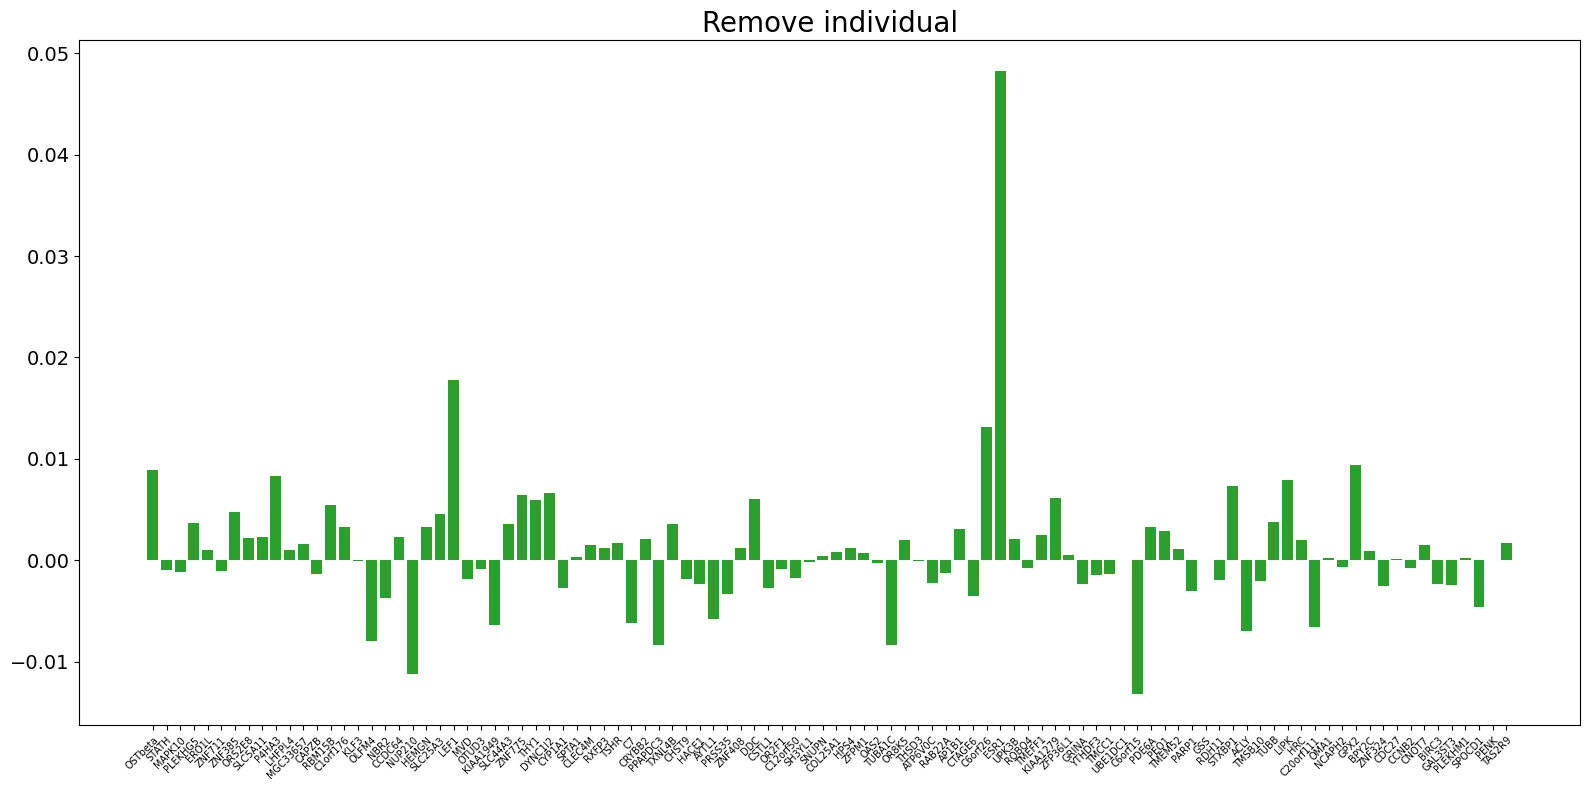

In [59]:
# Summary technique
%time remove_attr = summary.RemoveIndividual(game)

plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(remove_attr)), remove_attr, color='tab:green')
plt.tick_params(labelsize=14)
plt.xticks(np.arange(len(remove_attr)), genes,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=7)
plt.title('Remove individual', fontsize=20)
plt.tight_layout()
plt.show()

CPU times: user 2.28 s, sys: 2 ms, total: 2.28 s
Wall time: 2.3 s


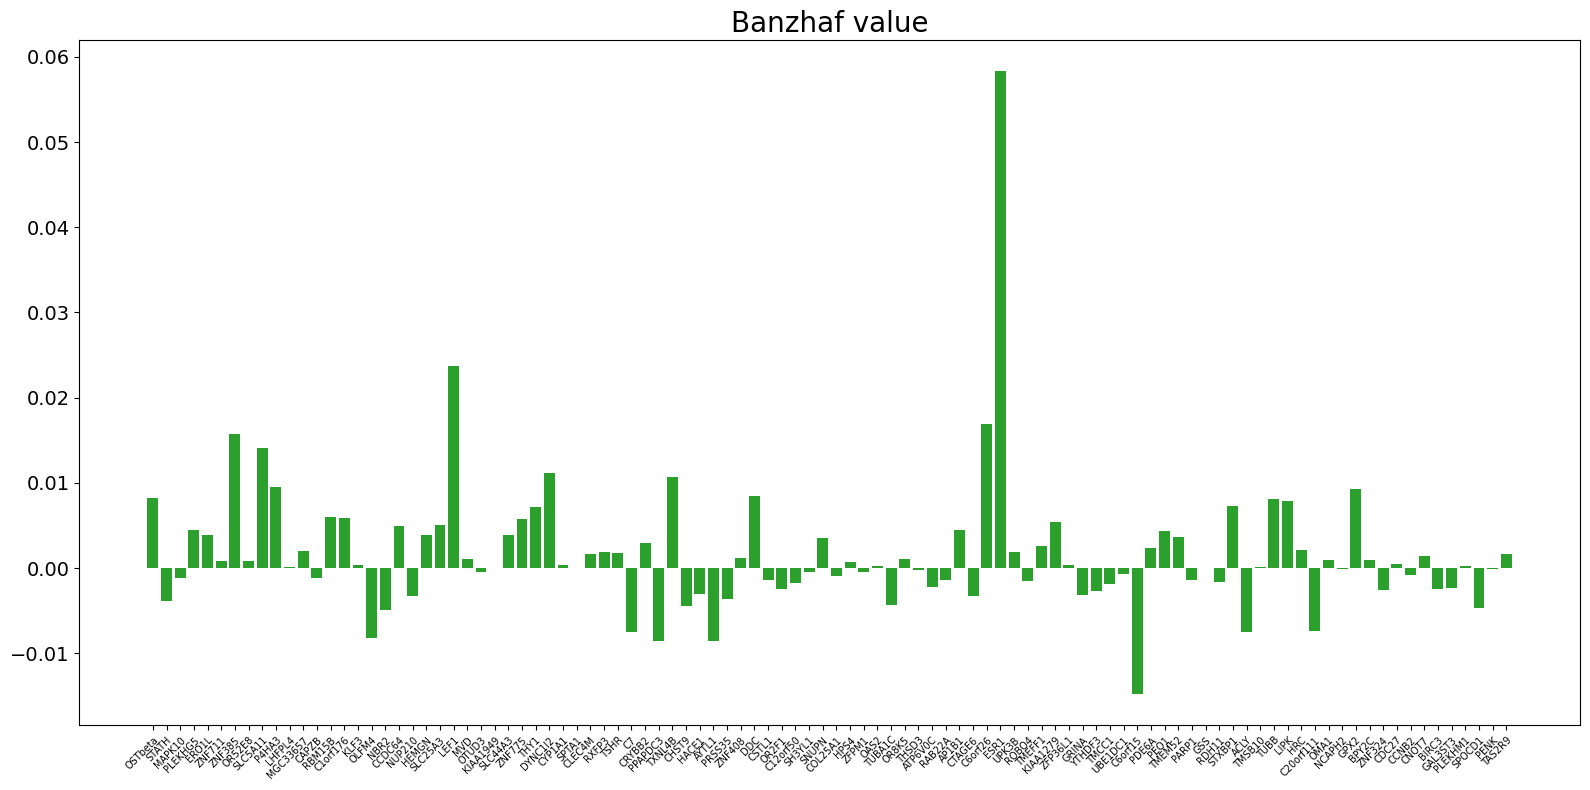

In [60]:
# Summary technique
%time banzhaf_attr = summary.BanzhafValue(game, thresh=0.01)

plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(banzhaf_attr)), banzhaf_attr, color='tab:green')
plt.tick_params(labelsize=14)
plt.xticks(np.arange(len(banzhaf_attr)), genes,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=7)
plt.title('Banzhaf value', fontsize=20)
plt.tight_layout()
plt.show()

CPU times: user 27.3 s, sys: 45.4 ms, total: 27.3 s
Wall time: 27.4 s


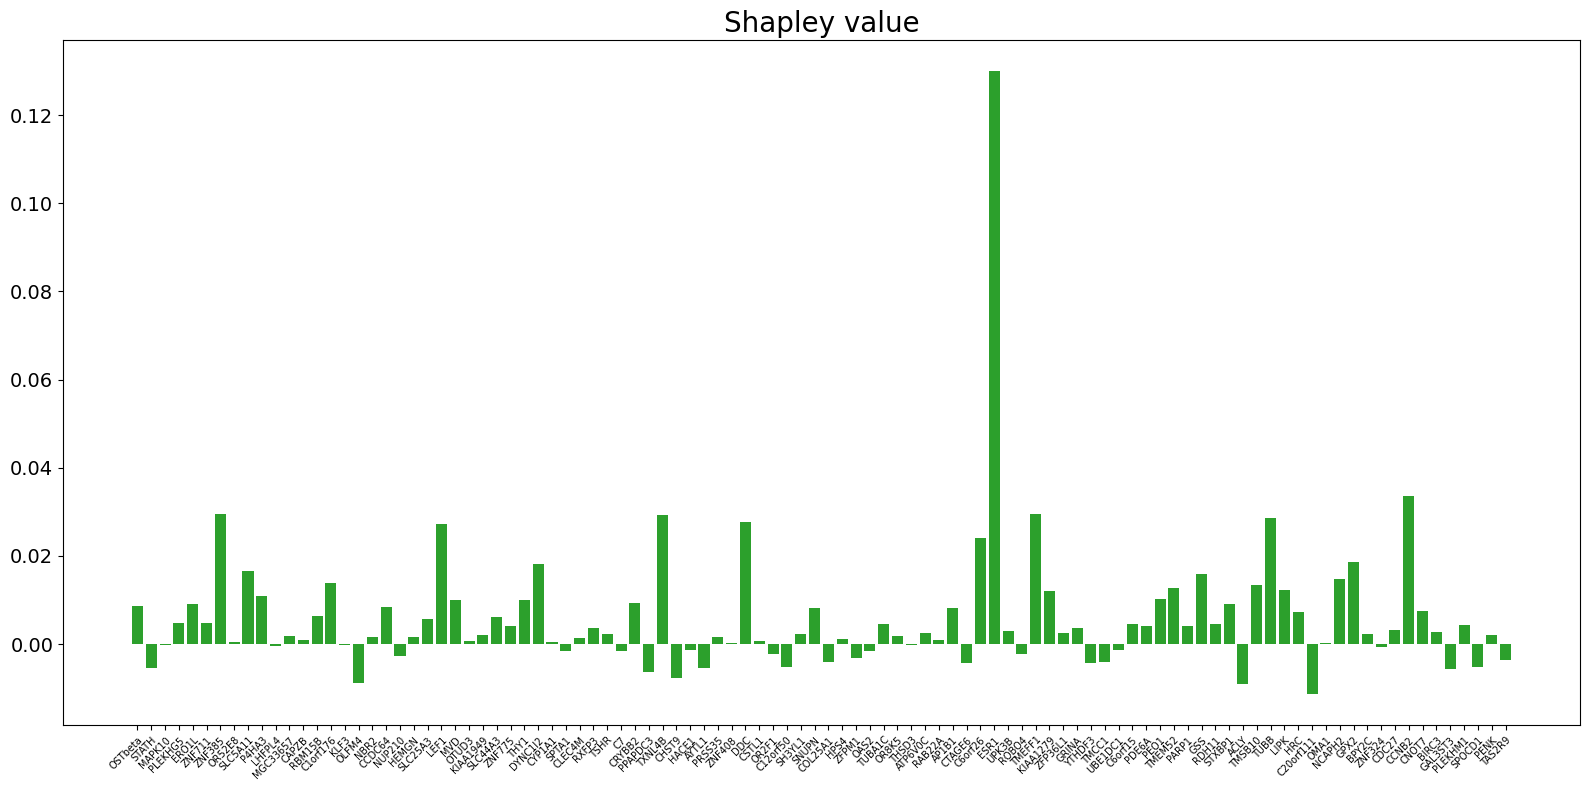

In [61]:
# Summary technique
%time shapley_attr = summary.ShapleyValue(game, thresh=0.01)

plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(shapley_attr)), shapley_attr, color='tab:green')
plt.tick_params(labelsize=14)
plt.xticks(np.arange(len(shapley_attr)), genes,
           rotation=45, rotation_mode='anchor',
           ha='right', fontsize=7)
plt.title('Shapley value', fontsize=20)
plt.tight_layout()
plt.show()

# Most important genes

In [62]:
# Setup
attr_list = [remove_attr, banzhaf_attr, shapley_attr]
attr_names = ['Remove', 'Banzhaf', 'Shapley']
num = 10
loss_list = []

# Train small models
for attr in attr_list:
    # Filter for important genes
    inds = np.argsort(attr)[-num:]
    X_train_small = X_train[:, inds]
    X_val_small = X_val[:, inds]
    X_test_small = X_test[:, inds]

    # Train model
    small_model = fit_model(X_train_small, Y_train, X_val_small, Y_val)
    loss = log_loss(Y_test, small_model.predict_proba(X_test_small))
    loss_list.append(loss)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

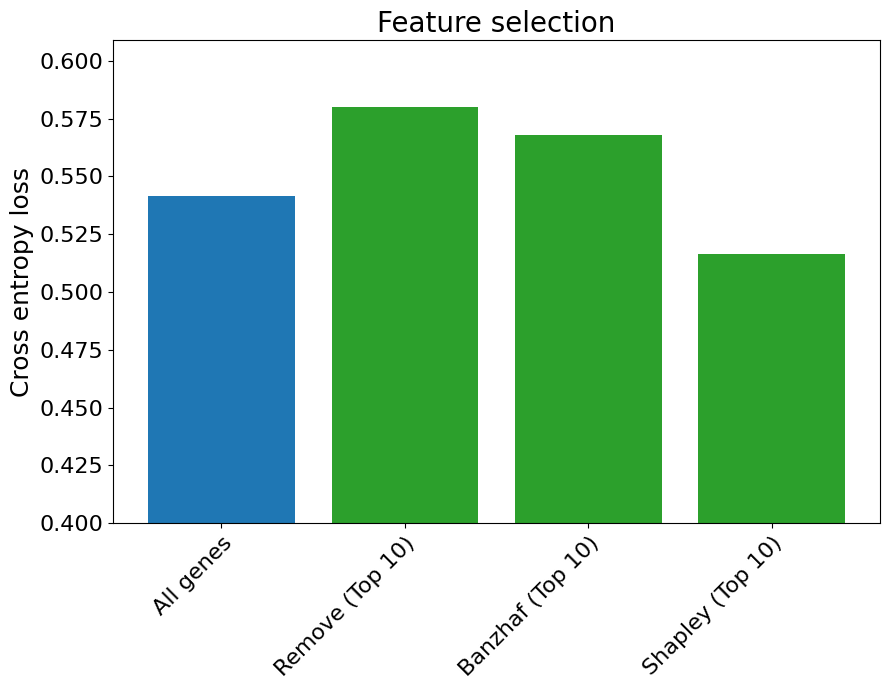

In [63]:
plt.figure(figsize=(9, 7))

plt.bar(np.arange(len(attr_list) + 1),
        [log_loss(Y_test, original_model.predict_proba(X_test))] + loss_list,
        color=['C0'] + ['tab:green' for _ in attr_list])
plt.xticks(np.arange(len(attr_list) + 1),
           ['All genes'] + ['{} (Top {})'.format(name, num) for name in attr_names],
           rotation=45, rotation_mode='anchor', ha='right')
plt.ylabel('Cross entropy loss', fontsize=18)
plt.title('Feature selection', fontsize=20)
plt.tick_params(labelsize=16)
plt.ylim(0.4, None)

plt.tight_layout()
plt.show()